In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
from statsmodels.stats.weightstats import ztest as ztest
from scipy.stats import pearsonr
from scipy.stats import chi2_contingency
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn import preprocessing
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
import pickle

In [3]:
df = pd.read_csv("data-midterm.csv")
df

,TimeToPlay,TimeToStudy,ProfessionalScore,InterviewScore,Sexuality,ExpectedSalary,SocialNetworkingTimeUse,Result
0,0.1,4.4,2.5,F,T,249.6,Much,NO
1,4.1,5.7,3.7,D,L,114.6,Pretty,YES
2,7.3,0.9,2.7,D,T,862.0,Almost,NO
3,6.2,8.8,2.7,D,T,147.2,Almost,YES
4,5.0,3.1,0.2,D,Q,653.4,Pretty,NO
...,...,...,...,...,...,...,...,...
995,2.9,6.3,1.2,C,Q,512.1,Almost,YES
996,3.8,1.5,2.8,B,T,267.6,Almost,NO
997,7.4,0.6,1.3,D,Q,884.2,None,YES
998,8.5,5.7,3.3,C,L,662.2,Pretty,YES


In [6]:
df['Result'] = df['Result'].astype('category')
df['Sexuality'] = df['Sexuality'].astype('category')

# Tạo bảng phân phối chéo
contingency_table = pd.crosstab(df['Sexuality'], df['Result'])

# Thực hiện kiểm định Chi-squared
chi2, p_value, _, _ = stats.chi2_contingency(contingency_table)

print(f"Kết quả kiểm định Chi-squared:")
print(f"Chi-squared Statistic: {chi2}")
print(f"P-value: {p_value}")

# Đánh giá kết quả kiểm định
alpha = 0.05
if p_value < alpha:
    print("Có bằng chứng cho thấy kết quả phỏng vấn phụ thuộc vào nhóm xu hướng tính dục.")
else:
    print("Không có bằng chứng cho thấy kết quả phỏng vấn phụ thuộc vào nhóm xu hướng tính dục.")

# Hồi quy logistic để đánh giá sự ảnh hưởng của các yếu tố khác
# Giả sử Result là biến nhị phân, bạn có thể cần mã hóa lại nếu cần
X = df[['TimeToPlay', 'TimeToStudy', 'ProfessionalScore', 'ExpectedSalary']]
y = df['Result'].cat.codes  # Mã hóa biến nhị phân

# Thêm hằng số vào mô hình hồi quy
X = sm.add_constant(X)

# Tạo mô hình hồi quy logistic
model = sm.Logit(y, X)
result = model.fit()

# In kết quả hồi quy
print(result.summary())

Kết quả kiểm định Chi-squared:
Chi-squared Statistic: 4.882577424112614
P-value: 0.2995593596531659
Không có bằng chứng cho thấy kết quả phỏng vấn phụ thuộc vào nhóm xu hướng tính dục.
Optimization terminated successfully.
         Current function value: 0.689396
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 1000
Model:                          Logit   Df Residuals:                      995
Method:                           MLE   Df Model:                            4
Date:                Wed, 09 Oct 2024   Pseudo R-squ.:                0.003614
Time:                        18:29:43   Log-Likelihood:                -689.40
converged:                       True   LL-Null:                       -691.90
Covariance Type:            nonrobust   LLR p-value:                    0.2872
                        coef    std err          z      P>|z|      [0.025      0.

In [7]:
crosstab = pd.crosstab(df['Sexuality'], df['InterviewScore'])

# In bảng Crosstab
print("Bảng Crosstab:")
print(crosstab)

# Tìm giá trị nhỏ nhất trong bảng Crosstab
min_value = crosstab.min().min()  # Giá trị nhỏ nhất
min_position = crosstab.stack().idxmin()  # Vị trí của giá trị nhỏ nhất

# Kết quả
print(f"\nGiá trị nhỏ nhất trong bảng Crosstab là: {min_value}")
print(f"Giá trị nhỏ nhất thuộc nhóm xu hướng tính dục: {min_position[0]} và điểm phỏng vấn: {min_position[1]}")

Bảng Crosstab:
InterviewScore   A   B    C    D   F
Sexuality                           
B                5  24   30   42  32
G                8  19   40   46  34
L                9  37   64   54  38
Q               16  65  126  122  84
T                6  15   31   32  21

Giá trị nhỏ nhất trong bảng Crosstab là: 5
Giá trị nhỏ nhất thuộc nhóm xu hướng tính dục: B và điểm phỏng vấn: A


In [8]:
X = df[['TimeToPlay', 'TimeToStudy']]  # Các biến độc lập
y = df['ProfessionalScore']  # Biến phụ thuộc

# Thêm hằng số vào biến độc lập
X = sm.add_constant(X)

# Xây dựng mô hình hồi quy tuyến tính
model = sm.OLS(y, X).fit()

# In tóm tắt mô hình
print(model.summary())

# Dự đoán điểm đánh giá năng lực cho thời gian tự học 5.0 và thời gian nghỉ 7.0
new_data = pd.DataFrame({'const': 1, 'TimeToPlay': [7.0], 'TimeToStudy': [5.0]})  # Thêm hằng số
predicted_score = model.predict(new_data)

# Kết quả dự đoán
print(f"\nĐiểm đánh giá năng lực dự đoán là: {predicted_score[0]}")

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        18:34:42   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [9]:
scores = df['ProfessionalScore']

# Giá trị trung bình giả thuyết
hypothesized_mean = 2.4575

# Tính trung bình và độ lệch chuẩn của mẫu
sample_mean = scores.mean()
sample_std = scores.std(ddof=1)  # Bậc tự do = n-1
n = len(scores)

# Thực hiện kiểm định t
t_statistic = (sample_mean - hypothesized_mean) / (sample_std / (n ** 0.5))
degrees_of_freedom = n - 1

# Tính p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Mức ý nghĩa
alpha = 0.05

# Kết quả
print(f"Trung bình mẫu: {sample_mean}")
print(f"Giá trị t: {t_statistic}")
print(f"Giá trị p: {p_value}")

if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết null.")
else:
    print("Không có đủ bằng chứng để bác bỏ giả thuyết null.")

Trung bình mẫu: 1.9397000000000009
Giá trị t: -14.33343592693223
Giá trị p: 0.0
Có đủ bằng chứng để bác bỏ giả thuyết null.


In [10]:
scores = df['ProfessionalScore']

# Giá trị trung bình giả thuyết
hypothesized_mean = 2.4575

# Tính trung bình và độ lệch chuẩn của mẫu
sample_mean = scores.mean()
sample_std = scores.std(ddof=1)  # Bậc tự do = n-1
n = len(scores)

# Thực hiện kiểm định t
t_statistic = (sample_mean - hypothesized_mean) / (sample_std / (n ** 0.5))
degrees_of_freedom = n - 1

# Tính p-value
p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df=degrees_of_freedom))

# Mức ý nghĩa
alpha = 0.05

# Kết quả
print(f"Trung bình mẫu: {sample_mean:.4f}")
print(f"Giá trị t: {t_statistic:.4f}")
print(f"Giá trị p: {p_value:.4f}")

# Đánh giá kết quả
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết null.")
else:
    print("Không có đủ bằng chứng để bác bỏ giả thuyết null.")

Trung bình mẫu: 1.9397
Giá trị t: -14.3334
Giá trị p: 0.0000
Có đủ bằng chứng để bác bỏ giả thuyết null.


Tỷ lệ phần trăm các nhóm giới tính:
Q    41.3
L    20.2
G    14.7
B    13.3
T    10.5
Name: Sexuality, dtype: float64


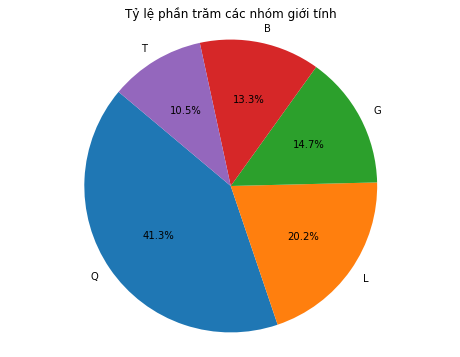

In [12]:

# Tính tỷ lệ phần trăm các nhóm giới tính
gender_counts = df['Sexuality'].value_counts(normalize=True) * 100

# Hiển thị kết quả
print("Tỷ lệ phần trăm các nhóm giới tính:")
print(gender_counts)

# Vẽ biểu đồ Pie
plt.figure(figsize=(8, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title("Tỷ lệ phần trăm các nhóm giới tính")
plt.axis('equal')  # Để biểu đồ hình tròn
plt.show()

In [14]:

# Tính trung bình điểm đánh giá năng lực
average_score = df['ProfessionalScore'].mean()

# Nhóm theo xu hướng tính dục và tính điểm đánh giá năng lực trung bình của từng nhóm
grouped = df.groupby('Sexuality')['ProfessionalScore'].mean()

# Lọc những nhóm có điểm đánh giá năng lực lớn hơn trung bình
result = grouped[grouped > average_score]

# Hiển thị kết quả
print(result)

Sexuality
B    2.025564
Q    1.960533
Name: ProfessionalScore, dtype: float64


In [15]:
most_common_score = df['InterviewScore'].mode()[0]

# Hiển thị kết quả
print(f"Đa số điểm phỏng vấn của sinh viên là: {most_common_score}")

Đa số điểm phỏng vấn của sinh viên là: D


In [16]:
bins = [0, 5, 7, 9, float('inf')]
labels = ['Bad', 'Pretty', 'Good', 'Excellent']

# Chia cột TimeToStudy thành các khoảng và gán nhãn
df['StudyCategory'] = pd.cut(df['TimeToStudy'], bins=bins, labels=labels, right=False)

# Tính số phần tử thuộc nhóm nhãn 'Good'
count_good = (df['StudyCategory'] == 'Good').sum()

# Hiển thị kết quả
print(f"Số phần tử thuộc nhóm nhãn 'Good': {count_good}")

Số phần tử thuộc nhóm nhãn 'Good': 201


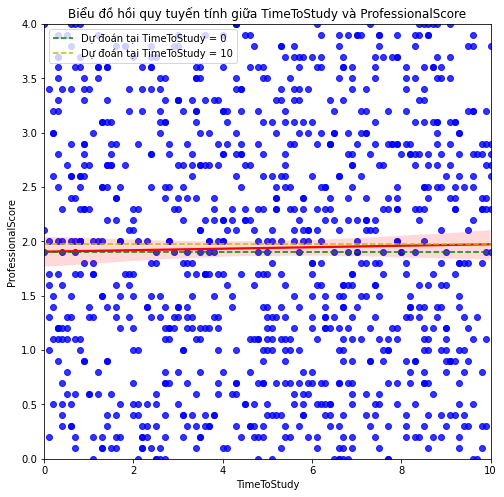

Dự đoán ProfessionalScore tại TimeToStudy = 0: 1.91
Dự đoán ProfessionalScore tại TimeToStudy = 10: 1.97


In [23]:
from sklearn.linear_model import LinearRegression


X = df[['TimeToStudy']]
y = df['ProfessionalScore']

# Khởi tạo và huấn luyện mô hình
model = LinearRegression()
model.fit(X, y)

# Dự đoán giá trị cho TimeToStudy từ 0 đến 10
time_to_study_range = np.linspace(0, 10, 100).reshape(-1, 1)
predicted_scores = model.predict(time_to_study_range)

# Tính toán khoảng giá trị dự đoán cho các TimeToStudy đã cho
predicted_min = model.predict([[0]])[0]  # Dự đoán tại TimeToStudy = 0
predicted_max = model.predict([[10]])[0]  # Dự đoán tại TimeToStudy = 10

# Vẽ biểu đồ hồi quy
plt.figure(figsize=(8, 8))
sns.regplot(x='TimeToStudy', y='ProfessionalScore', data=df, scatter_kws={'color': 'blue'}, line_kws={'color': 'red'})
plt.xlabel('TimeToStudy')
plt.ylabel('ProfessionalScore')
plt.title('Biểu đồ hồi quy tuyến tính giữa TimeToStudy và ProfessionalScore')
plt.xlim(0, 10)
plt.ylim(0, 4)
plt.axhline(y=predicted_min, color='g', linestyle='--', label='Dự đoán tại TimeToStudy = 0')
plt.axhline(y=predicted_max, color='y', linestyle='--', label='Dự đoán tại TimeToStudy = 10')
plt.legend()
plt.show()

# Hiển thị kết quả dự đoán
print(f"Dự đoán ProfessionalScore tại TimeToStudy = 0: {predicted_min:.2f}")
print(f"Dự đoán ProfessionalScore tại TimeToStudy = 10: {predicted_max:.2f}")

In [24]:
data_shape = df.shape
print(f"Kích thước của dữ liệu: {data_shape[0]} hàng, {data_shape[1]} cột.")

Kích thước của dữ liệu: 1000 hàng, 9 cột.


In [25]:
filtered_df = df[(df['Sexuality'] == 'T') & (df['InterviewScore'] == 'B')]

# Kiểm tra xem có dữ liệu nào không
if filtered_df.empty:
    print("Không có dữ liệu nào thỏa mãn điều kiện.")
else:
    # Lấy dữ liệu cho TimeToPlay và TimeToStudy
    time_to_play = filtered_df['TimeToPlay']
    time_to_study = filtered_df['TimeToStudy']

    # Thực hiện kiểm định t
    t_stat, p_value = stats.ttest_ind(time_to_play, time_to_study, equal_var=False)  # Giả thiết phương sai không bằng nhau

    # Kết quả
    alpha = 0.05  # Mức sai lầm
    print(f"Kết quả p-value: {p_value:.4f}")
    if p_value < alpha:
        print("Bác bỏ giả thuyết không: Trung bình TimeToPlay và TimeToStudy khác nhau.")
    else:
        print("Không bác bỏ giả thuyết không: Trung bình TimeToPlay và TimeToStudy không khác nhau.")

Kết quả p-value: 0.4267
Không bác bỏ giả thuyết không: Trung bình TimeToPlay và TimeToStudy không khác nhau.


In [26]:
bins = [0, 0.2, 0.5, 0.6, 0.8, 1]  # Các khoảng
labels = ['A', 'B', 'C', 'D', 'E']  # Nhãn tương ứng

# Phân loại ProfessionalScore
df['ScoreCategory'] = pd.cut(df['ProfessionalScore'], bins=bins, labels=labels, include_lowest=True)

# Giá trị cần kiểm tra
value_to_check = 2.7

# Kiểm tra giá trị ProfessionalScore = 2.7 thuộc khoảng nào
category = df[df['ProfessionalScore'] == value_to_check]['ScoreCategory']

if not category.empty:
    print(f"Giá trị ProfessionalScore = {value_to_check} thuộc khoảng chia: {category.values[0]}")
else:
    print(f"Giá trị ProfessionalScore = {value_to_check} không thuộc bất kỳ khoảng nào đã định nghĩa.")

Giá trị ProfessionalScore = 2.7 thuộc khoảng chia: nan


In [27]:
# Thêm hằng số vào mô hình
X = df[['TimeToPlay', 'TimeToStudy']]
X = sm.add_constant(X)  # Thêm hằng số vào mô hình
y = df['ProfessionalScore']

# Xây dựng mô hình hồi quy
model = sm.OLS(y, X).fit()

# Kết quả hồi quy
print(model.summary())

# So sánh mức độ tác động
coefficients = model.params[1:]  # Lấy hệ số hồi quy của các biến
print("\nHệ số hồi quy:")
print(coefficients)

# Tính toán tỷ lệ tác động giữa TimeToStudy và TimeToPlay
impact_ratio = coefficients['TimeToStudy'] / coefficients['TimeToPlay']
print(f"\nTỷ lệ tác động giữa TimeToStudy và TimeToPlay: {impact_ratio:.2f}")

                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        19:01:04   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [28]:
# Kết quả hồi quy từ mô hình
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        19:01:50   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [29]:
# Đặt biến độc lập và phụ thuộc
X = df[['TimeToPlay', 'TimeToStudy']]
y = df['ProfessionalScore']

# Thêm hằng số vào biến độc lập
X = sm.add_constant(X)

# Tạo mô hình hồi quy
model = sm.OLS(y, X).fit()

# In kết quả
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      ProfessionalScore   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.253
Date:                Wed, 09 Oct 2024   Prob (F-statistic):              0.286
Time:                        19:03:09   Log-Likelihood:                -1550.3
No. Observations:                1000   AIC:                             3107.
Df Residuals:                     997   BIC:                             3121.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           1.8134      0.096     18.860      

In [30]:
max_value = max(time_to_study)
min_value = min(time_to_study)

# Số bin
num_bins = 20

# Tính độ lớn của mỗi bin
bin_size = (max_value - min_value) / num_bins
bin_size

0.48

In [34]:
professional_scores= df[['ProfessionalScore']]
Q1 = np.percentile(professional_scores, 25)
Q1

1.0

In [35]:
Q1 = df['ProfessionalScore'].quantile(0.25)
Q1

1.0

In [36]:
Q1 = np.percentile(professional_scores, 25)
Q3 = np.percentile(professional_scores, 75)

# Tính IQR
IQR = Q3 - Q1

# Xác định khoảng nghi ngờ bất thường
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

lower_bound, upper_bound

(-1.8499999999999996, 5.75)

In [40]:
# Tính toán Q1, Q3 và IQR
Q1 = df['ProfessionalScore'].quantile(0.25)
Q3 = df['ProfessionalScore'].quantile(0.75)
IQR = Q3 - Q1

# Xác định ngưỡng ngoại lệ
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Tìm các điểm ngoại lệ
outliers = df[(df['ProfessionalScore'] < lower_bound) | (df['ProfessionalScore'] > upper_bound)]

# Kết quả
print(f"Giá trị Q1: {Q1}")
print(f"Giá trị Q3: {Q3}")
print(f"IQR: {IQR}")
print(f"Ngưỡng dưới: {lower_bound}")
print(f"Ngưỡng trên: {upper_bound}")
print("Điểm ngoại lệ:")
print(outliers)

Giá trị Q1: 1.0
Giá trị Q3: 2.9
IQR: 1.9
Ngưỡng dưới: -1.8499999999999996
Ngưỡng trên: 5.75
Điểm ngoại lệ:
Empty DataFrame
Columns: [TimeToPlay, TimeToStudy, ProfessionalScore, InterviewScore, Sexuality, ExpectedSalary, SocialNetworkingTimeUse, Result, StudyCategory, ScoreCategory]
Index: []


In [39]:
mean = np.mean(df['TimeToPlay'])
std_dev = np.std(df['TimeToPlay'])

# Calculate Z-scores
z_scores = [(x - mean) / std_dev for x in df['TimeToPlay']]

# Identify outliers based on Z-scores (e.g., absolute value greater than 3)
outliers = [x for x, z in zip(df['TimeToPlay'], z_scores) if abs(z) > 3]

print("Potential outliers in TimeToPlay:", outliers)

Potential outliers in TimeToPlay: []


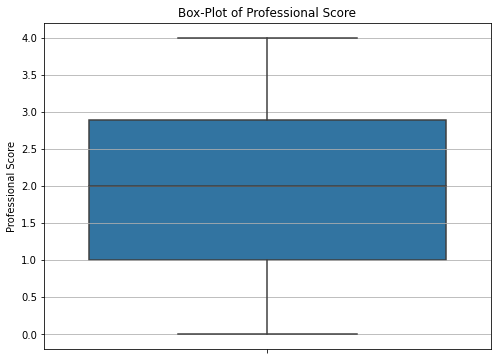

In [41]:
plt.figure(figsize=(8, 6))
sns.boxplot(y=df['ProfessionalScore'])
plt.title('Box-Plot of Professional Score')
plt.ylabel('Professional Score')
plt.grid(axis='y')

# Hiển thị biểu đồ
plt.show()

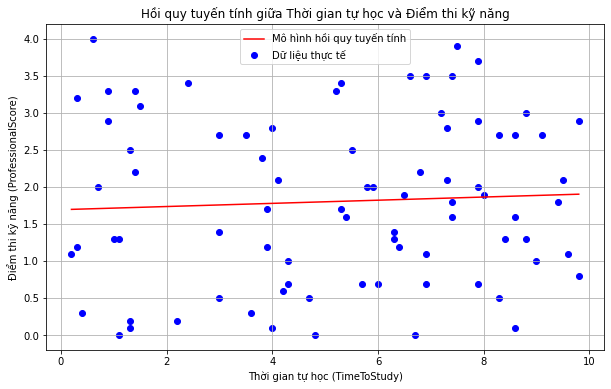

Dự báo điểm thi kỹ năng trong khoảng: [1.70, 1.91]


In [42]:
filtered_df = df[(df['Sexuality'] == 'G') & (df['Result'] == 'NO')]

# Kiểm tra xem có dữ liệu sau khi lọc không
if not filtered_df.empty:
    # Tạo mô hình hồi quy tuyến tính
    X = filtered_df[['TimeToStudy']]
    y = filtered_df['ProfessionalScore']
    
    model = LinearRegression()
    model.fit(X, y)

    # Dự đoán giá trị
    time_to_study_range = np.linspace(X['TimeToStudy'].min(), X['TimeToStudy'].max(), 100).reshape(-1, 1)
    predictions = model.predict(time_to_study_range)

    # Kết quả
    predicted_min = predictions.min()
    predicted_max = predictions.max()

    # Vẽ biểu đồ
    plt.figure(figsize=(10, 6))
    plt.scatter(X, y, color='blue', label='Dữ liệu thực tế')
    plt.plot(time_to_study_range, predictions, color='red', label='Mô hình hồi quy tuyến tính')
    plt.title('Hồi quy tuyến tính giữa Thời gian tự học và Điểm thi kỹ năng')
    plt.xlabel('Thời gian tự học (TimeToStudy)')
    plt.ylabel('Điểm thi kỹ năng (ProfessionalScore)')
    plt.legend()
    plt.grid()
    plt.show()

    print(f"Dự báo điểm thi kỹ năng trong khoảng: [{predicted_min:.2f}, {predicted_max:.2f}]")
else:
    print("Không có dữ liệu nào với giới tính là 'G' và kết quả phỏng vấn là 'NO'.")

In [43]:
# Tính Q1
Q1 = df['ProfessionalScore'].quantile(0.25)

print(f"25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: {Q1:.2f}")

25% số lượng sinh viên có điểm đánh giá năng lực cao hơn: 1.00


In [44]:
# Định nghĩa các khoảng phân vị và nhãn
bins = [0, 0.2, 0.5, 0.6, 0.8, 1]  # Các khoảng phân vị
labels = ['A', 'B', 'C', 'D', 'E']  # Nhãn tương ứng

# Thực hiện phân loại ProfessionalScore
df['ScoreCategory'] = pd.cut(df['ProfessionalScore'], bins=bins, labels=labels, right=False)

# Hiển thị kết quả
print(df[['ProfessionalScore', 'ScoreCategory']])

     ProfessionalScore ScoreCategory
0                  2.5           NaN
1                  3.7           NaN
2                  2.7           NaN
3                  2.7           NaN
4                  0.2             B
..                 ...           ...
995                1.2           NaN
996                2.8           NaN
997                1.3           NaN
998                3.3           NaN
999                0.3             B

[1000 rows x 2 columns]


In [45]:
contingency_table = pd.crosstab(df['InterviewScore'], df['Sexuality'])

# Thực hiện kiểm tra Chi-squared
chi2, p, _, _ = stats.chi2_contingency(contingency_table)

# Kết quả
alpha = 0.05
print(f'Giá trị Chi-squared: {chi2:.2f}, p-value: {p:.4f}')
if p < alpha:
    print("Có sự phụ thuộc giữa kết quả phỏng vấn và nhóm xu hướng tính dục.")
else:
    print("Không có sự phụ thuộc giữa kết quả phỏng vấn và nhóm xu hướng tính dục.")

Giá trị Chi-squared: 8.57, p-value: 0.9301
Không có sự phụ thuộc giữa kết quả phỏng vấn và nhóm xu hướng tính dục.


In [46]:
mean = df['ProfessionalScore'].mean()
std_dev = df['ProfessionalScore'].std(ddof=1)  # Độ lệch chuẩn mẫu
n = len(df['ProfessionalScore'])  # Số lượng mẫu

# Giả thuyết không
hypothesized_mean = 2.4575

# Tính t-statistic
t_statistic = (mean - hypothesized_mean) / (std_dev / (n ** 0.5))

# Tính p-value cho kiểm tra hai phía
p_value = stats.t.sf(abs(t_statistic), df=n-1) * 2

# Kết quả
alpha = 0.05
print(f'Trung bình mẫu: {mean:.4f}, Độ lệch chuẩn: {std_dev:.4f}, t-statistic: {t_statistic:.4f}, p-value: {p_value:.4f}')
if p_value < alpha:
    print("Có đủ bằng chứng để bác bỏ giả thuyết rằng trung bình điểm đánh giá năng lực là 2.4575.")
else:
    print("Không có đủ bằng chứng để bác bỏ giả thuyết rằng trung bình điểm đánh giá năng lực là 2.4575.")

Trung bình mẫu: 1.9397, Độ lệch chuẩn: 1.1424, t-statistic: -14.3334, p-value: 0.0000
Có đủ bằng chứng để bác bỏ giả thuyết rằng trung bình điểm đánh giá năng lực là 2.4575.


In [47]:
mode_value = df['InterviewScore'].mode()[0]

# Hiển thị kết quả
print(f'Giá trị đa số của điểm phỏng vấn là: {mode_value}')


Giá trị đa số của điểm phỏng vấn là: D


In [48]:
# Định nghĩa các khoảng và nhãn
bins = [0, 5, 7, 9, float('inf')]  # Khoảng giá trị
labels = ['Bad', 'Pretty', 'Good', 'Excellent']  # Nhãn tương ứng

# Phân chia TimeToStudy và gán nhãn
df['StudyCategory'] = pd.cut(df['TimeToStudy'], bins=bins, labels=labels, right=False)

# Đếm số phần tử thuộc nhóm nhãn 'Good'
count_good = df[df['StudyCategory'] == 'Good'].shape[0]

# Hiển thị kết quả
print(f'Số phần tử thuộc nhóm nhãn "Good": {count_good}')

Số phần tử thuộc nhóm nhãn "Good": 201
